# SWMAL Exercise

## Mathematical Foundation

### Vector and matrix representation in python

#### Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.





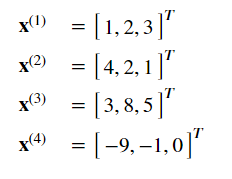

Here we show how to implement a matrix using the numpy python module by implementing the matrix from above.

In [7]:
import numpy as np

y = np.array([1,2,3,4]) # NOTE: you'll need this later

x1 = [1, 2, 3]
x2 = [4, 2, 1]
x3 = [3, 8 ,5]
x4 = [-9, -1, 0]

# Creating nested array
X = np.array([x1, x2, x3, x4])

print(f"{X}")

[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


### Norms, metrics or distances

#### Qb
Here we show how to use the norms L1 and L2 for vectors using python, and it's `math` module. When we have written our L1 and L2 functions we use the assert given in the assignment to validate the final outcome of the arrays.
 

In [11]:
import math

def CheckArraySizeCoantainsElements(x):
    assert x.shape[0]>=0 
    if not x.ndim==1:
        raise Exception("Array not bigger than 1 dimension") 

def L2(x):
    CheckArraySizeCoantainsElements(x)
    s = 0
    for i in range(x.size): 
        s = s + x[i] * x[i] 
    return s**(1/2)

def L1(x):
    CheckArraySizeCoantainsElements(x)
    return sum((i**2)**0.5 for i in x) 
  
# Using dot and sqrrrrt the real python way
# The reason we don't need to write x.T is because of the np.dot function
def L2Dot(x):
    return np.sqrt(np.dot(x,x))

    
# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot - expected_d2) < eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


## The cost function, $J$

### Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).

In this exercise we will show how we implement the RMSE function by using the X matrix and y from exercise Qa. We use a dummy function h that takes the first column of X as its 'prediction'. 

    h_dummy(X) = X(:,0)


In [3]:
from math import fabs

# Define the root mean square error function using the L2 norm defined earlier
def RMSE(y_pred, y_true):
    # Check if y_pred and y_true have the same shape
    if y_pred.shape != y_true.shape:
        raise ValueError("Input arrays y_pred and y_true must have the same shape.")
    return L2(y_pred - y_true)/2

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls our RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


### MAE

#### Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.

Since we already created a RMSE function in a previous exercise. We here also are going to create a function MAE to calculate the norm of L1 instead of L2 

In [4]:
# Define the mean absolute error function using the L1 norm defined earlier
def MAE(y_pred, y_true):
    # Check if y_pred and y_true have the same shape
    if y_pred.shape != y_true.shape:
        raise ValueError("Input arrays y_pred and y_true must have the same shape.")
    return L1(y_pred - y_true)/y_pred.size

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert fabs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


## Pythonic Code

### Robustness of Code

#### Qe Robust Code 

We have to add error checking code (asserts or exceptions), that checks for the right sizes of y(hat)-y sizes of the MSE and MAE functions.

### Qf Conclusion

In conclusion, going through the exercises for the supervised data-flow model in Python has provided valuable insights into representations of matrices and vectors as well as various distance metrics. We have computed the cost function, RMSE (Root Mean Square Error), and applied two different norms - L1 (Euclidean) and L2 (Box-City) - to evaluate the loss/cost of the model aka how bad it is compared to the true value. Low number is good, high number is bad.

Through these exercises, we have learned that linear algebra is a important part of understanding and optimizing supervised learning algorithms. 

The fundamental concepts are essential for anyone working with machine learning and data science, as they form the basis for building robust and accurate predictive models. 